"""
#🐾 Animal Faces HQ (AFHQ) - Image Classification using CNN 🧠

## 📘 About the Dataset
--------------------
This dataset, also known as **Animal Faces-HQ (AFHQ)**, consists of **16,130 high-quality images**
at **512×512 resolution**.

It contains **three domains of animal faces**, each with about **5,000 images** representing
a diverse range of breeds and appearances.

**Classes:**
1. 🐱 Cat
2. 🐶 Dog
3. Wildlife


## Import libraries

In [34]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing  import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


## Load dataset

In [35]:
# Download latest version
path = kagglehub.dataset_download("andrewmvd/animal-faces")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'animal-faces' dataset.
Path to dataset files: /kaggle/input/animal-faces


In [36]:
train_dir=os.path.join(path,'afhq','train')
test_dir=os.path.join(path,'afhq','val')

In [37]:
IMAGE_SIZE=(128,128)
BATCH_SIZE=12
train_ds=image_dataset_from_directory(train_dir,
                                      image_size=IMAGE_SIZE,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      )
test_ds=image_dataset_from_directory(test_dir,
                                      image_size=IMAGE_SIZE,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True
                                      )

Found 14630 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


In [38]:
class_names=train_ds.class_names
n_classes=len(class_names)
print(class_names)


['cat', 'dog', 'wild']


# # defin Rescaling + Resizing function

In [39]:
def Image_resize_and_rescale(image):
    image=tf.image.resize(image,(128,128))
    image=image/255.0
    return image

# Apply Rescaling + Resizing function

In [40]:
train_ds=train_ds.map(lambda x,y: (Image_resize_and_rescale(x),y))
test_ds=test_ds.map(lambda x,y: (Image_resize_and_rescale(x),y))

 # Optimize dataset performance


In [41]:
train_ds=train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

 # Build CNN model

In [42]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(n_classes,activation='softmax')


])

# Compile model

In [43]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model

In [44]:
history=model.fit(train_ds,epochs=10,verbose=2)

Epoch 1/10
1220/1220 - 51s - 41ms/step - accuracy: 0.8340 - loss: 0.3766
Epoch 2/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9578 - loss: 0.1168
Epoch 3/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9711 - loss: 0.0781
Epoch 4/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9805 - loss: 0.0563
Epoch 5/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9850 - loss: 0.0410
Epoch 6/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9861 - loss: 0.0380
Epoch 7/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9895 - loss: 0.0301
Epoch 8/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9915 - loss: 0.0279
Epoch 9/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9905 - loss: 0.0288
Epoch 10/10
1220/1220 - 10s - 8ms/step - accuracy: 0.9920 - loss: 0.0254


# Plot training history


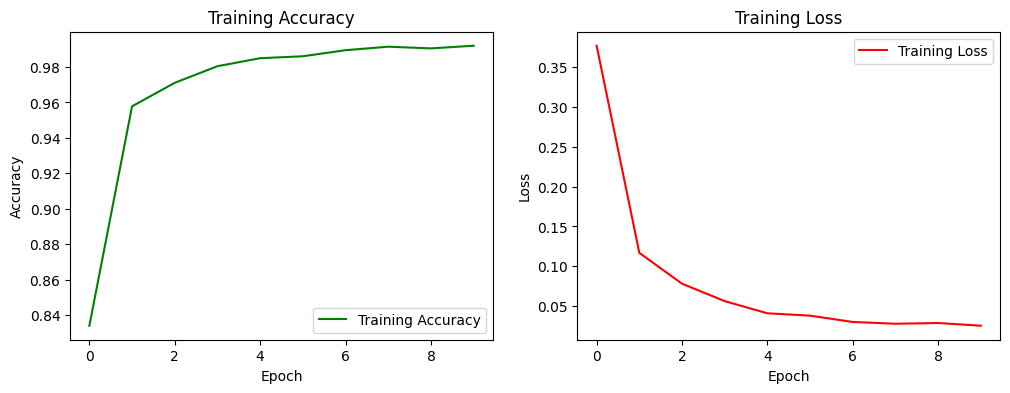

In [46]:
# Plot training accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Evaluate model

In [47]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9679 - loss: 0.0964
Test Accuracy: 96.47%
Test Loss: 0.1381


# Confusion Matrix and Classification Report


<Figure size 600x600 with 0 Axes>

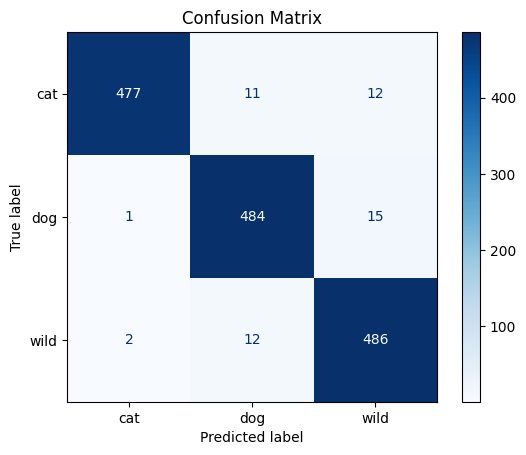

In [49]:
# Get true and predicted labels
true_labels = []
pred_labels = []

for images, labels in test_ds:
    preds = model.predict(images,verbose=0)
    pred_labels.extend(np.argmax(preds, axis=1))
    true_labels.extend(labels.numpy())

# Convert to numpy arrays
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Display confusion matrix
plt.figure(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()
